In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv("heart_2020_cleaned.csv")


In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.shape
# dataset consist of 319795 rows and 18 columns

(319795, 18)

In [5]:
df.info()
# information about the dataset like dtypes,features and non_null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df.isna().sum()
# dataset does not contains null values

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
df.duplicated().sum()
# no.of duplicates rows (18078)

18078

In [8]:
df.drop_duplicates(inplace=True)
# removing the duplicates rows

In [9]:
df.shape
# structure of the dataset after removing duplicates

(301717, 18)

In [10]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


# EXPLORATORY DATA ANALYSIS

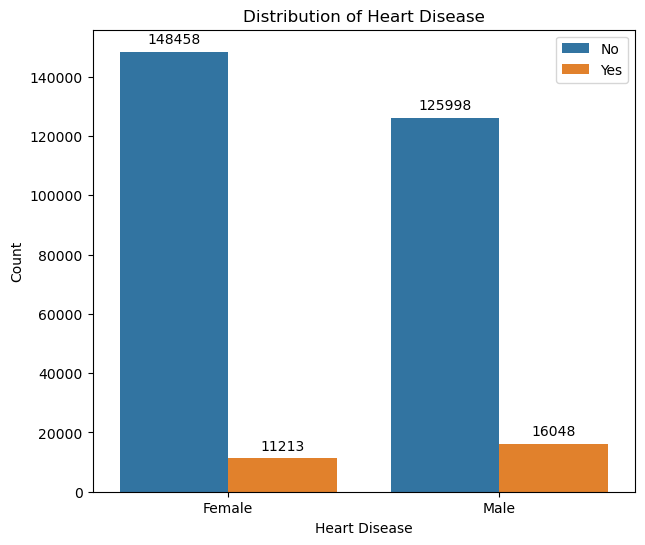

In [11]:
plt.figure(figsize=(7,6))
ax=sns.countplot(x="Sex",data=df,hue="HeartDisease")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 9),  textcoords='offset points')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(loc=0)
plt.show()

In [ ]:
# Distribution of heart disease is high for male when compare to female

<Axes: >

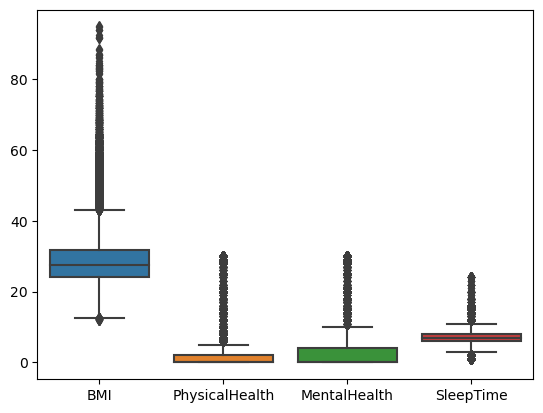

In [12]:
sns.boxplot(df)

In [13]:
def outleirs_treatment(df):
    for i in df.columns:
        if i in df.select_dtypes(include="number").columns:
            Q1 = df[i].quantile(0.25)
            Q3 = df[i].quantile(0.75)
            IQR = Q3 - Q1
        
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            print(f"{i} lower_bound value: {lower_bound} and upper bound value {upper_bound}")
            
outleirs_treatment(df)      

BMI lower_bound value: 12.600000000000005 and upper bound value 43.08
PhysicalHealth lower_bound value: -3.0 and upper bound value 5.0
MentalHealth lower_bound value: -6.0 and upper bound value 10.0
SleepTime lower_bound value: 3.0 and upper bound value 11.0


In [14]:
df.shape

(301717, 18)

In [15]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]  
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']  

In [16]:
dp=df.copy()

In [17]:
dp["category"]=pd.cut(dp['BMI'],bins=bins,labels=labels)

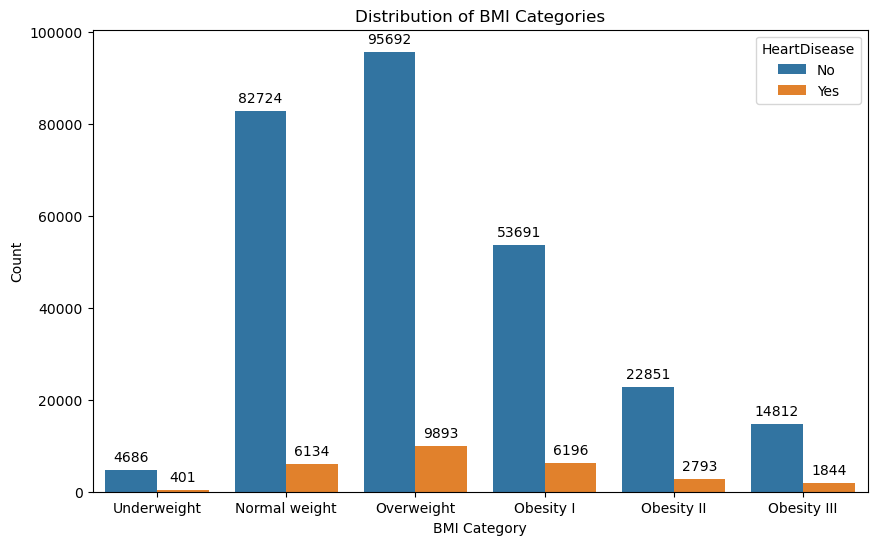

In [18]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='category', data=dp,hue='HeartDisease')  
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 9),  textcoords='offset points')
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# distribution of BMI for several weight categories:
# overweight category has high chance of heart disease

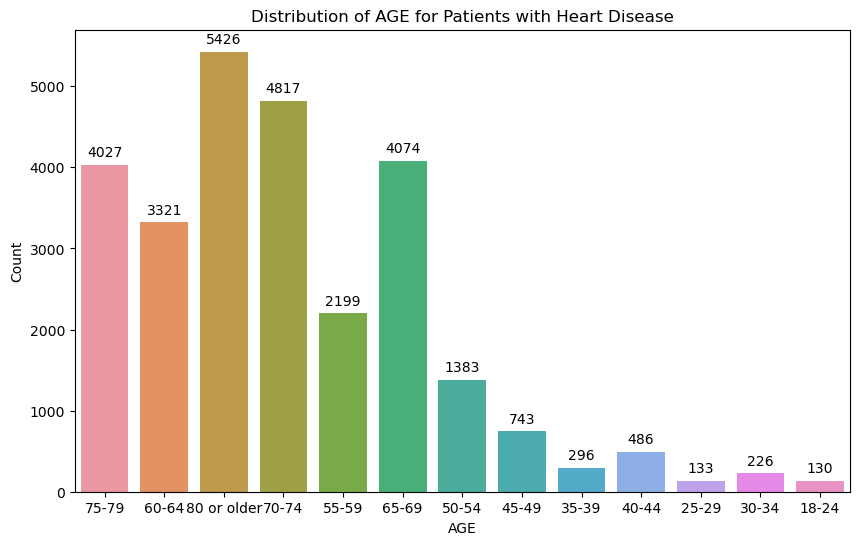

In [19]:
plt.figure(figsize=(10,6))
a=df[df['HeartDisease']=="Yes"]
ax=sns.countplot(x="AgeCategory",data=a)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 9),  textcoords='offset points')
plt.title('Distribution of AGE for Patients with Heart Disease')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.show()

In [ ]:
# age from 80 or older has high chance of heart disease compared with different age categories

In [20]:
b=['Smoking', 'AlcoholDrinking', 'Stroke', 'Diabetic','Asthma', 'KidneyDisease', 'SkinCancer']

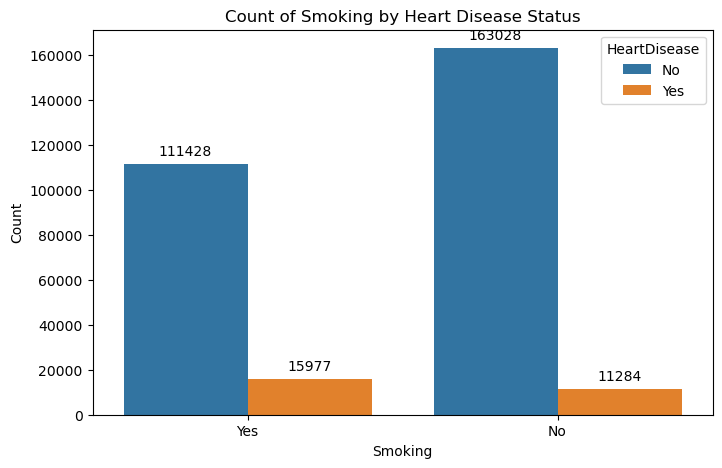

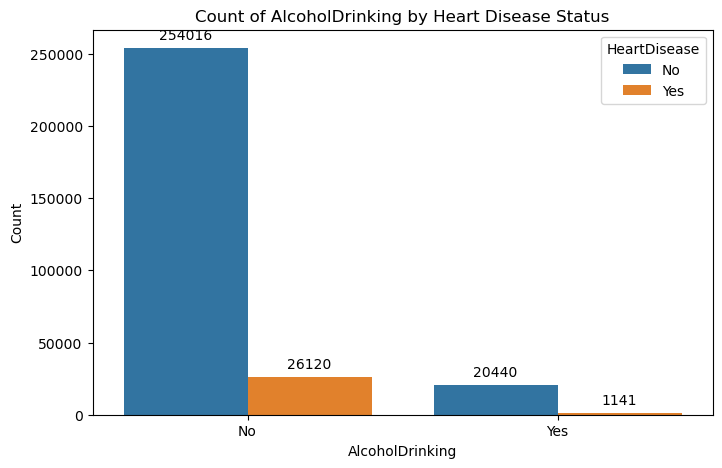

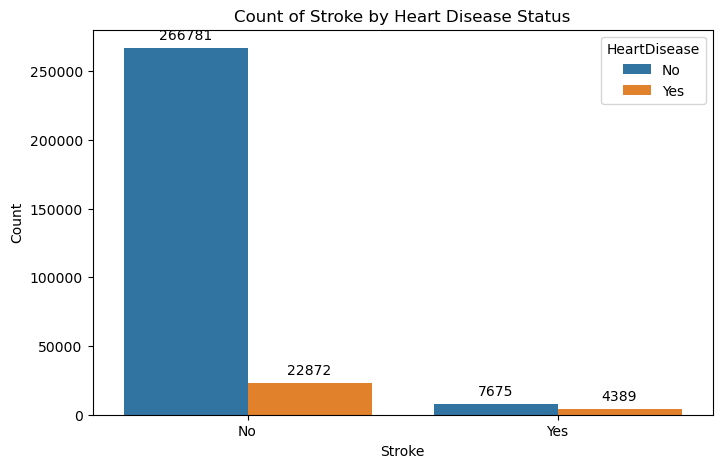

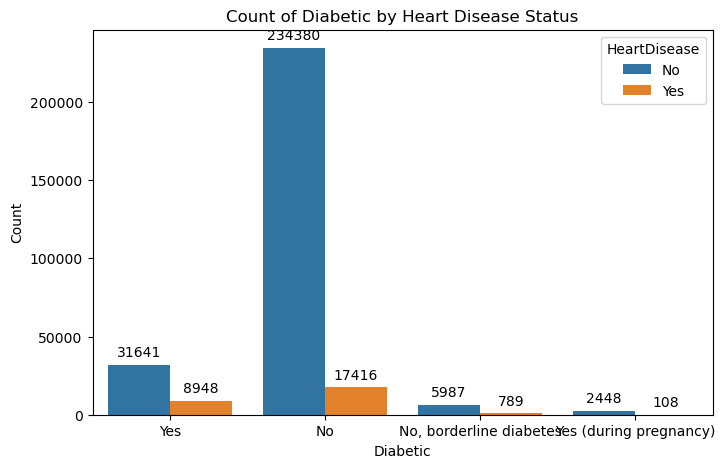

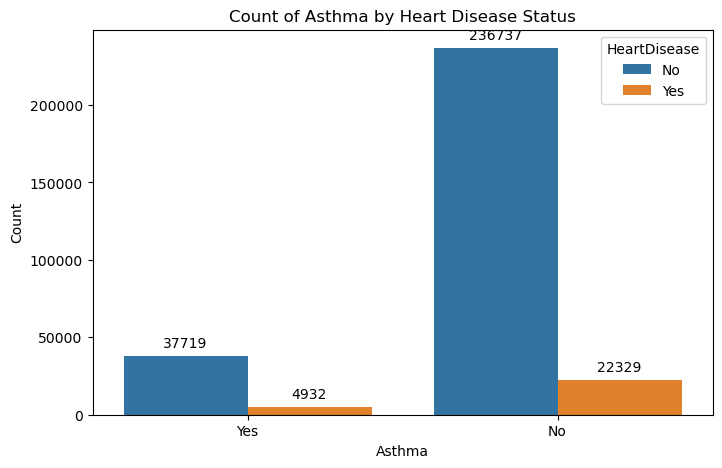

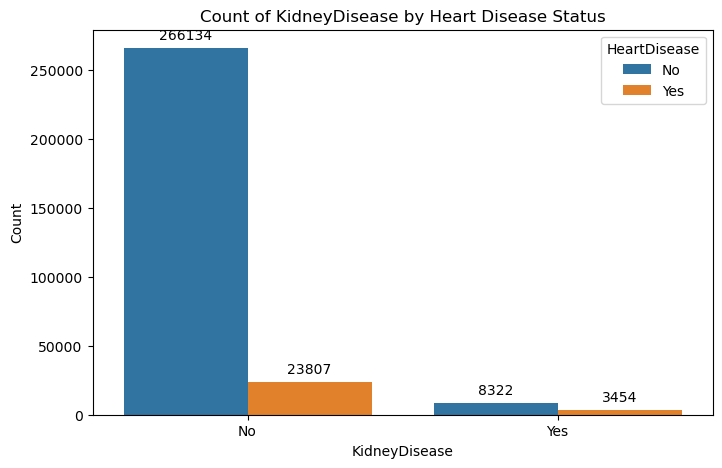

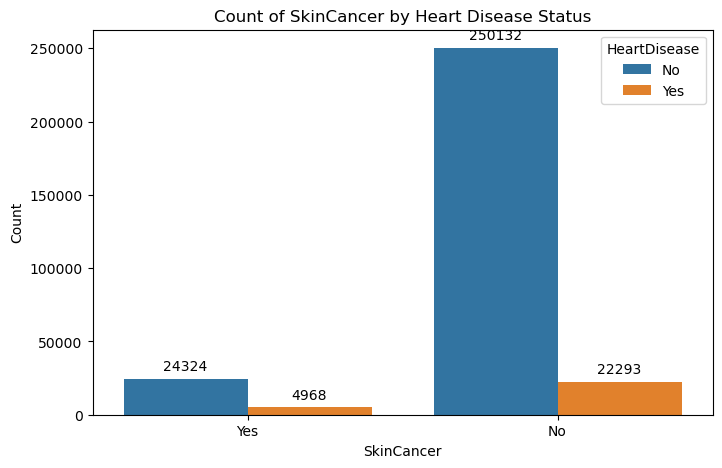

In [21]:
for i in b:
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    sns.countplot(x=i, data=df, hue='HeartDisease', ax=ax)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    ax.set_title(f'Count of {i} by Heart Disease Status')
    ax.set_xlabel(i)
    ax.set_ylabel('Count')

In [ ]:
#smoking person has high chance of heart disease

In [ ]:
df['HealthCompositeScore']=(df['PhysicalHealth'] + df['MentalHealth']) / 2

In [ ]:
def categorize_health(score):
    if score <= 14:
        return 'Poor health'
    elif score <= 22:
        return 'Fair health'
    else:
        return 'Good health'

df['HealthStatus'] = df['HealthCompositeScore'].apply(categorize_health)

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="HealthStatus",data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 9),  textcoords='offset points')
plt.title('Distribution of HealthStatus')
plt.xlabel('HealthStatus')
plt.ylabel('Count')
plt.show()

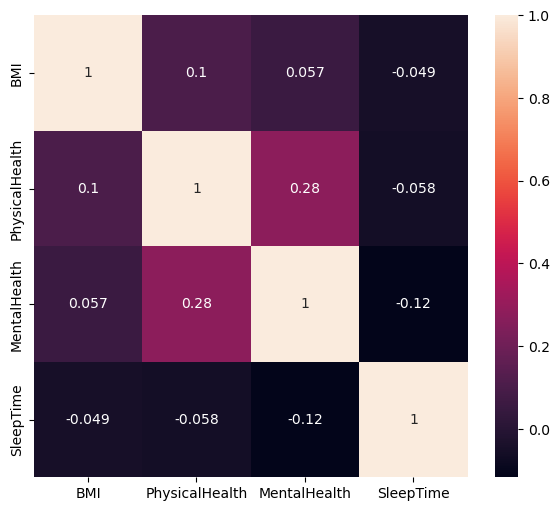

In [22]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [23]:
#df=pd.read_csv("heart_2020_cleaned.csv")

# DATA PREPROCESSING

In [24]:
# Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le



In [25]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [26]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
for i in df.columns:
    if i in ['BMI',"PhysicalHealth","MentalHealth","SleepTime"]:
        df[i]=power.fit_transform(df[[i]])


In [27]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-2.774709,1,0,0,1.361247,1.658088,0,0,7,5,2,1,4,-1.447537,1,0,1
1,0,-1.556737,0,0,1,-0.656580,-0.756786,0,0,12,5,0,1,4,-0.036235,0,0,0
2,0,-0.150213,1,0,0,1.758292,1.658088,0,1,9,5,2,1,1,0.637502,1,0,0
3,0,-0.617043,0,0,0,-0.656580,-0.756786,0,0,11,5,0,0,2,-0.730041,0,0,1
4,0,-0.724808,0,0,0,1.778052,-0.756786,1,0,4,5,0,1,4,0.637502,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,-0.001915,1,0,0,1.622203,-0.756786,1,1,8,3,2,0,1,-0.730041,1,0,0
319791,0,0.394300,1,0,0,-0.656580,-0.756786,0,1,3,3,0,1,4,-1.447537,1,0,0
319792,0,-0.610688,0,0,0,-0.656580,-0.756786,0,0,5,3,0,1,2,-0.730041,0,0,0
319793,0,0.814325,0,0,0,-0.656580,-0.756786,0,0,1,3,0,0,2,3.178245,0,0,0


In [28]:
# Features and Target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']



In [29]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# MODEL BUILDING

In [30]:
# Function to train and evaluate model
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))



In [31]:
# Initial Evaluation
print("Original training set class distribution:")
print(y_train.value_counts())
train_and_evaluate(X_train, y_train, X_test, y_test)

Original training set class distribution:
0    219562
1     21811
Name: HeartDisease, dtype: int64
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     54894
           1       0.31      0.15      0.20      5450

    accuracy                           0.89     60344
   macro avg       0.62      0.56      0.57     60344
weighted avg       0.86      0.89      0.88     60344



In [32]:
# SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

In [33]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [34]:
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

# MODEL EVALUATION

In [35]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84     54903
           1       0.80      0.93      0.86     54880

    accuracy                           0.85    109783
   macro avg       0.86      0.85      0.85    109783
weighted avg       0.86      0.85      0.85    109783



# THEORETICAL TASK